In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Airlines+Data.csv',parse_dates=True)
data.index.freq='MS'

In [3]:

data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
data.isnull()

,Month,Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
91,False,False
92,False,False
93,False,False
94,False,False


In [6]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

<Axes: >

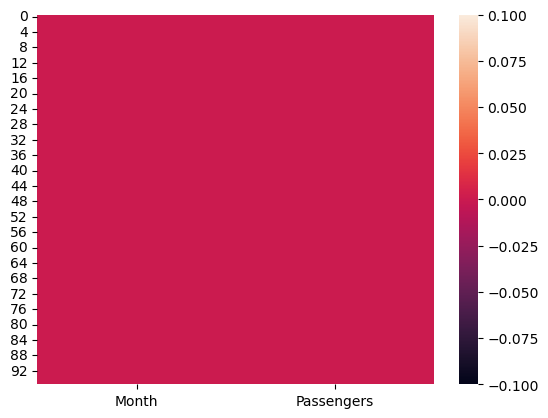

In [7]:
sns.heatmap(data.isnull())

In [8]:
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data.set_index('Month', inplace=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# visualize the data


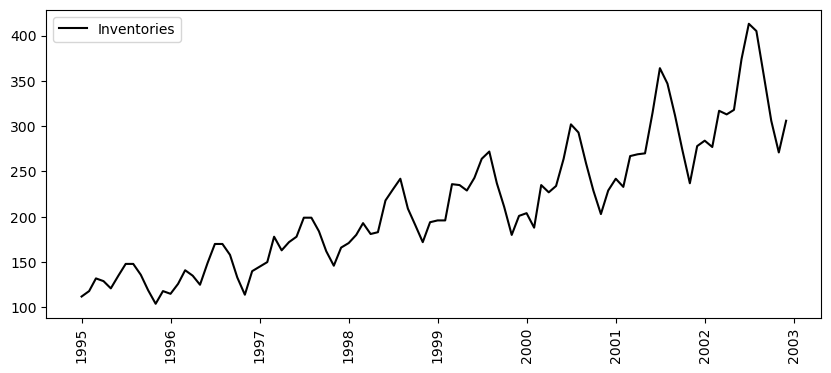

In [9]:
plt.figure(figsize=(10,4))
plt.plot(data, label='Inventories',color='black')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [10]:
from statsmodels.tsa.seasonal import STL,seasonal_decompose

In [11]:
res = STL(data['Passengers']).fit()

[]

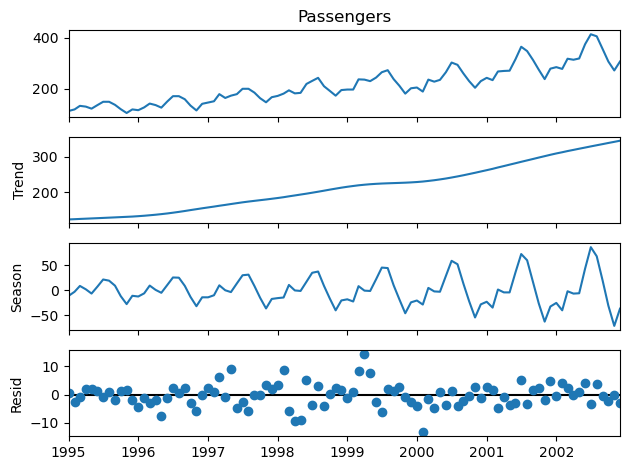

In [12]:
res.plot()
plt.plot()

# split the data

In [13]:
train_length=int(len(data)*0.75)
test_length=len(data)-train_length

In [14]:
train_length,test_length

(72, 24)

In [15]:
train_data=data.iloc[:train_length]
test_data=data.iloc[train_length:]


In [16]:
train_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [17]:
test_data.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


In [18]:
test_results=test_data.copy()

# build the simple Exponential smoothing


In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


# Simple ExponentialSmoothing

In [20]:
ses_model=SimpleExpSmoothing(train_data['Passengers']).fit(smoothing_level=0.2)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [21]:
test_results['SES_model']=ses_model.forecast(test_length)
test_results.head()

,Passengers,SES_model
Month,,
2001-01-01,242,237.974268
2001-02-01,233,237.974268
2001-03-01,267,237.974268
2001-04-01,269,237.974268
2001-05-01,270,237.974268


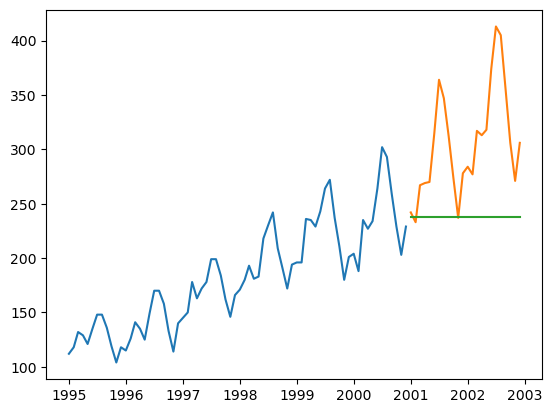

In [22]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_results['SES_model'])
plt.show()

In [23]:
mse=mean_squared_error(test_data['Passengers'],test_results['SES_model'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_results['SES_model'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_results['SES_model'])

In [24]:
test_matrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [25]:
test_matrics['SES_Model']=[mse,rmse,mae,mape]

In [26]:
test_matrics

,SES_Model
MSE,6997.881659
RMSE,83.653342
MAE,68.646443
MAPE,0.205919


# douple ExponentialSmoothing

### additive

In [27]:
desadd_model=ExponentialSmoothing(train_data['Passengers'],trend='add').fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
test_results['DES_ADD']=desadd_model.forecast(test_length)
test_results.head()

,Passengers,SES_model,DES_ADD
Month,,,
2001-01-01,242,237.974268,230.691016
2001-02-01,233,237.974268,232.382517
2001-03-01,267,237.974268,234.074018
2001-04-01,269,237.974268,235.765519
2001-05-01,270,237.974268,237.457021


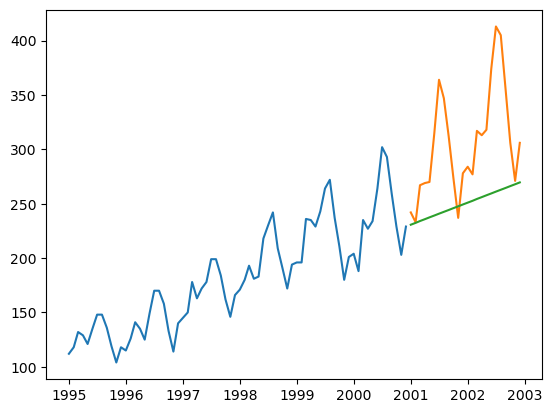

In [29]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_results['DES_ADD'])
plt.show()

In [30]:
mse=mean_squared_error(test_data['Passengers'],test_results['DES_ADD'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_results['DES_ADD'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_results['DES_ADD'])

In [31]:
test_matrics['DES_add']=[mse,rmse,mae,mape]

In [32]:
test_matrics

,SES_Model,DES_add
MSE,6997.881659,5062.761521
RMSE,83.653342,71.153085
MAE,68.646443,56.865556
MAPE,0.205919,0.169917


### multipe

In [33]:
desmul_model=ExponentialSmoothing(train_data['Passengers'],trend='mul').fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
test_results['DES_MUL']=desadd_model.forecast(test_length)
test_results.head()

,Passengers,SES_model,DES_ADD,DES_MUL
Month,,,,
2001-01-01,242,237.974268,230.691016,230.691016
2001-02-01,233,237.974268,232.382517,232.382517
2001-03-01,267,237.974268,234.074018,234.074018
2001-04-01,269,237.974268,235.765519,235.765519
2001-05-01,270,237.974268,237.457021,237.457021


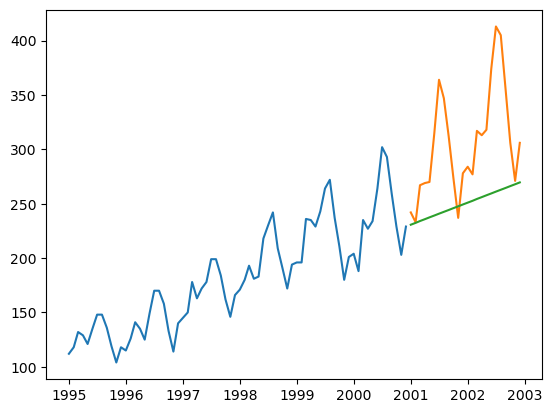

In [35]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_results['DES_MUL'])
plt.show()

In [36]:
mse=mean_squared_error(test_data['Passengers'],test_results['DES_MUL'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_results['DES_MUL'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_results['DES_MUL'])

In [37]:
test_matrics['DES_MUL']=[mse,rmse,mae,mape]
test_matrics

,SES_Model,DES_add,DES_MUL
MSE,6997.881659,5062.761521,5062.761521
RMSE,83.653342,71.153085,71.153085
MAE,68.646443,56.865556,56.865556
MAPE,0.205919,0.169917,0.169917


# Triple ExponentialSmoothing

### Additive


In [38]:
tesadd_model=ExponentialSmoothing(train_data['Passengers'],trend='add',seasonal='add').fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
test_results['TES_ADD']=tesadd_model.forecast(test_length)
test_results.head()

,Passengers,SES_model,DES_ADD,DES_MUL,TES_ADD
Month,,,,,
2001-01-01,242,237.974268,230.691016,230.691016,230.654423
2001-02-01,233,237.974268,232.382517,232.382517,233.154024
2001-03-01,267,237.974268,234.074018,234.074018,259.320552
2001-04-01,269,237.974268,235.765519,235.765519,251.820418
2001-05-01,270,237.974268,237.457021,237.457021,250.820100


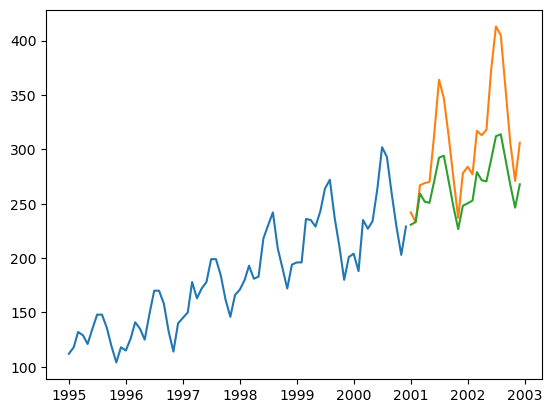

In [40]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_results['TES_ADD'])
plt.show()

In [41]:
mse=mean_squared_error(test_data['Passengers'],test_results['TES_ADD'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_results['TES_ADD'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_results['TES_ADD'])

In [42]:
test_matrics['TES_ADD']=[mse,rmse,mae,mape]
test_matrics

,SES_Model,DES_add,DES_MUL,TES_ADD
MSE,6997.881659,5062.761521,5062.761521,2262.980603
RMSE,83.653342,71.153085,71.153085,47.570796
MAE,68.646443,56.865556,56.865556,39.883236
MAPE,0.205919,0.169917,0.169917,0.120850


### multipe

In [43]:
tesmul_model=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul').fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
test_results['TES_MUL']=tesmul_model.forecast(test_length)
test_results.head()

,Passengers,SES_model,DES_ADD,DES_MUL,TES_ADD,TES_MUL
Month,,,,,,
2001-01-01,242,237.974268,230.691016,230.691016,230.654423,233.064640
2001-02-01,233,237.974268,232.382517,232.382517,233.154024,234.636500
2001-03-01,267,237.974268,234.074018,234.074018,259.320552,274.649519
2001-04-01,269,237.974268,235.765519,235.765519,251.820418,264.204622
2001-05-01,270,237.974268,237.457021,237.457021,250.820100,263.842410


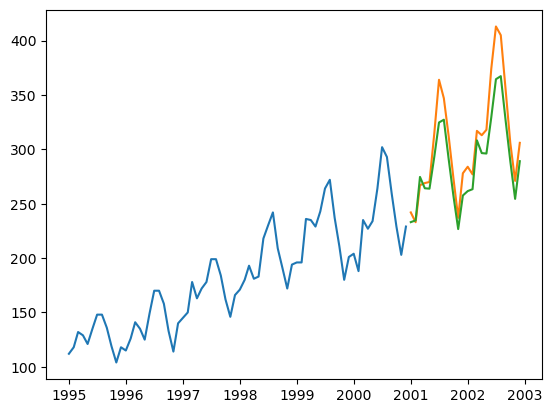

In [45]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_results['TES_MUL'])
plt.show()

In [46]:
mse=mean_squared_error(test_data['Passengers'],test_results['TES_MUL'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_results['TES_MUL'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_results['TES_MUL'])

In [47]:
test_matrics['TES_MUL']=[mse,rmse,mae,mape]
test_matrics

,SES_Model,DES_add,DES_MUL,TES_ADD,TES_MUL
MSE,6997.881659,5062.761521,5062.761521,2262.980603,531.705182
RMSE,83.653342,71.153085,71.153085,47.570796,23.058733
MAE,68.646443,56.865556,56.865556,39.883236,19.600330
MAPE,0.205919,0.169917,0.169917,0.120850,0.060350


In [48]:
test_results['SES_Model']=ses_model
test_results['DES_A_Model']=desadd_model.forecast(test_length)
test_results['DES_M_Model']=desmul_model.forecast(test_length)
test_results['TES_A_Model']=tesadd_model.forecast(test_length)
test_results['TES_M_Model']=tesmul_model.forecast(test_length)
test_results.head()

,Passengers,SES_model,DES_ADD,DES_MUL,TES_ADD,TES_MUL,SES_Model,DES_A_Model,DES_M_Model,TES_A_Model,TES_M_Model
Month,,,,,,,,,,,
2001-01-01,242,237.974268,230.691016,230.691016,230.654423,233.064640,<statsmodels.tsa.holtwinters.results.HoltWinte...,230.691016,229.617770,230.654423,233.064640
2001-02-01,233,237.974268,232.382517,232.382517,233.154024,234.636500,<statsmodels.tsa.holtwinters.results.HoltWinte...,232.382517,230.319547,233.154024,234.636500
2001-03-01,267,237.974268,234.074018,234.074018,259.320552,274.649519,<statsmodels.tsa.holtwinters.results.HoltWinte...,234.074018,231.023469,259.320552,274.649519
2001-04-01,269,237.974268,235.765519,235.765519,251.820418,264.204622,<statsmodels.tsa.holtwinters.results.HoltWinte...,235.765519,231.729542,251.820418,264.204622
2001-05-01,270,237.974268,237.457021,237.457021,250.820100,263.842410,<statsmodels.tsa.holtwinters.results.HoltWinte...,237.457021,232.437773,250.820100,263.842410


# bulid the forecasting model

In [49]:
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul').fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
forecast_values=final_model.forecast(test_length)

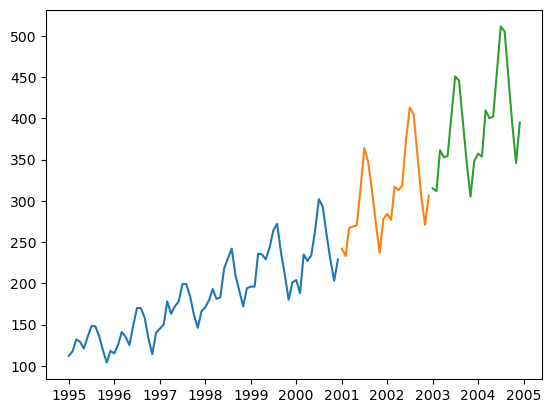

In [51]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_values)
plt.show()

In [52]:
print(test_results.columns)

Index(['Passengers', 'SES_model', 'DES_ADD', 'DES_MUL', 'TES_ADD', 'TES_MUL',
       'SES_Model', 'DES_A_Model', 'DES_M_Model', 'TES_A_Model',
       'TES_M_Model'],
      dtype='object')


# Test for stationarity

In [53]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

In [54]:
sts.adfuller(data.Passengers)

(1.3402479596467132,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [55]:
df_test=[]

In [56]:
def adf_test(data):
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [57]:
adf_test(data)

Failed to reject the null hypothesis
Data is Not stationary


# ACF and PACF for Returns

In [58]:
import statsmodels.graphics.tsaplots as sgt

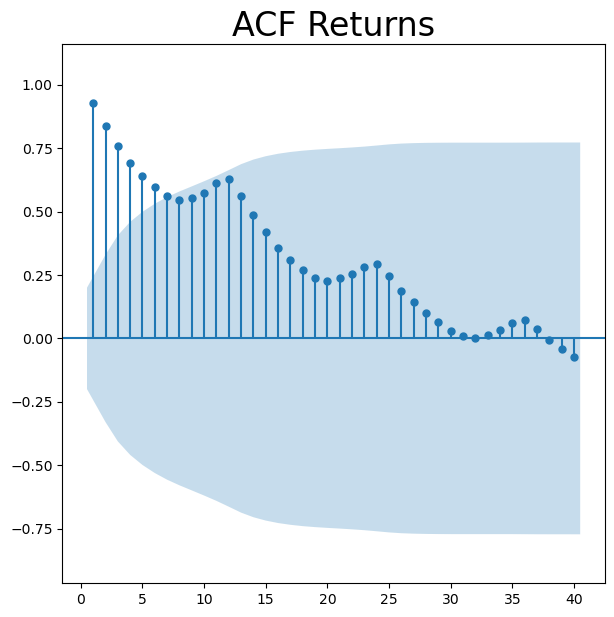

In [59]:
fig, ax = plt.subplots(figsize=(7, 7))
sgt.plot_acf(data.Passengers, lags=40, zero = False, ax=ax,auto_ylims=True)
plt.title("ACF Returns", size=24)
plt.show()

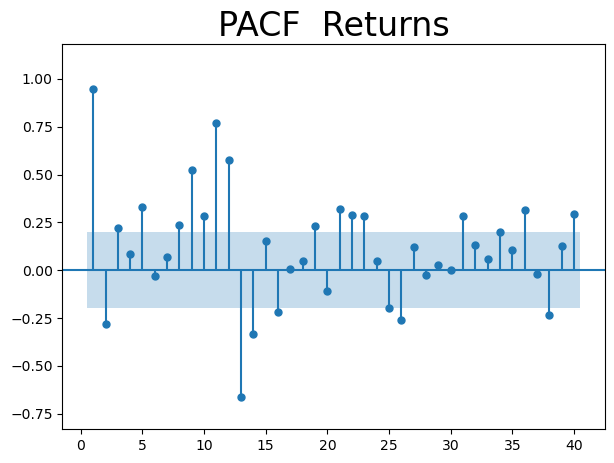

In [60]:
fig, ax = plt.subplots(figsize=(7, 5))
sgt.plot_pacf(data.Passengers, lags = 40, zero = False, method = ('ols'), ax=ax, auto_ylims=True)
plt.title("PACF  Returns", size=24)
plt.show()

In [61]:
data.mean()

Passengers    213.708333
dtype: float64

In [62]:
data.var()

Passengers    5172.229825
dtype: float64

# Differencing the data

In [63]:
from statsmodels.tsa.statespace.tools import diff

In [64]:
df_1 = diff(data,k_diff=2)

In [65]:
adf_test(df_1)

Reject the null hypothesis
Data is stationary


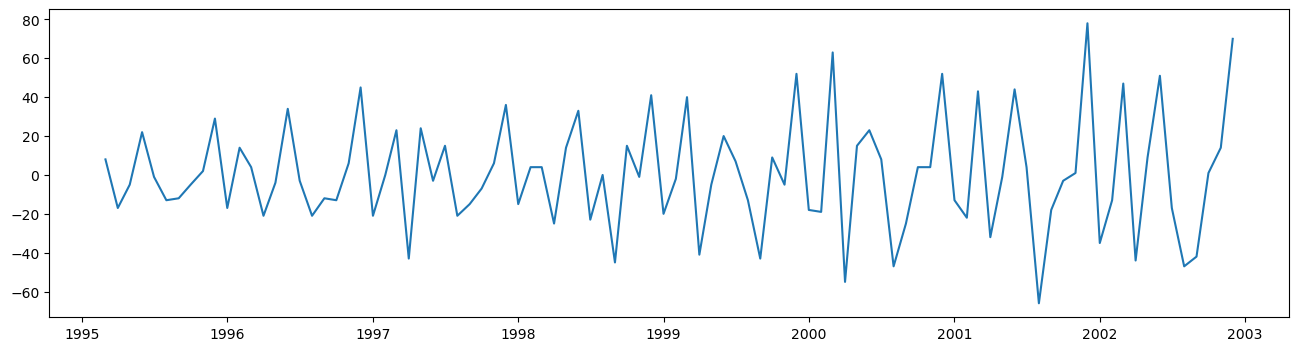

In [66]:
plt.figure(figsize=(16,4))

plt.plot(df_1)
plt.show()

# pmdarima

In [67]:
from pmdarima import auto_arima

In [68]:
auto_model = auto_arima(df_1,  trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=898.325, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.026, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=888.522, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=889.305, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=890.522, Time=0.12 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 3.063 seconds


In [69]:
auto_model.predict(10)

2003-01-01   -24.924801
2003-02-01   -15.079725
2003-03-01    12.368410
2003-04-01     1.203602
2003-05-01    -4.302871
2003-06-01     0.872697
2003-07-01     1.119612
2003-08-01    -0.605916
2003-09-01    -0.180636
2003-10-01     0.246343
Freq: MS, dtype: float64

### split the data

In [70]:
int(len(data)*0.8)

76

In [71]:
train_data=data[:76]

In [72]:
test_data=data[76:]

In [73]:
train_len=len(train_data)
test_len=len(test_data)

In [74]:
train_len,test_len

(76, 20)

# bulid the model

In [75]:
from statsmodels.tsa.arima_model import ARIMA

In [76]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['Passengers'], order=(8, 5, 4)).fit()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
test_pred=model.forecast(53)
test_pred

2001-05-01      251.206668
2001-06-01      279.897049
2001-07-01      340.589008
2001-08-01      377.334081
2001-09-01      408.076832
2001-10-01      455.844938
2001-11-01      505.547171
2001-12-01      574.833196
2002-01-01      647.504155
2002-02-01      729.761063
2002-03-01      841.274344
2002-04-01      946.625311
2002-05-01     1038.553505
2002-06-01     1165.926164
2002-07-01     1330.379474
2002-08-01     1484.800264
2002-09-01     1645.921350
2002-10-01     1839.597608
2002-11-01     2047.713020
2002-12-01     2264.256752
2003-01-01     2498.852568
2003-02-01     2763.183316
2003-03-01     3057.073864
2003-04-01     3360.892116
2003-05-01     3672.483735
2003-06-01     4023.803010
2003-07-01     4414.714169
2003-08-01     4813.475953
2003-09-01     5234.325203
2003-10-01     5702.747568
2003-11-01     6201.165568
2003-12-01     6715.158621
2004-01-01     7263.377907
2004-02-01     7859.780525
2004-03-01     8494.359228
2004-04-01     9154.613300
2004-05-01     9848.122023
2

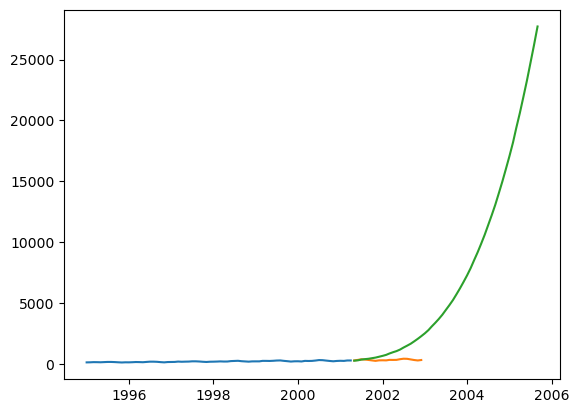

In [78]:
plt.plot(train_data['Passengers'])
plt.plot(test_data['Passengers'])
plt.plot(test_pred)
plt.show()

In [79]:
model = ARIMA(data['Passengers'], order=(6, 4, 5)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
forecast_values=model.forecast(53)

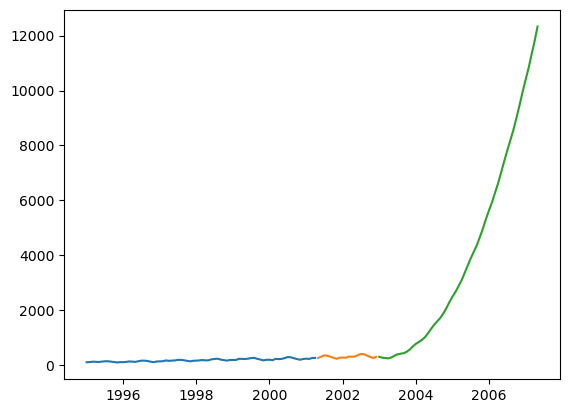

In [81]:
plt.plot(train_data['Passengers'])
plt.plot(test_data['Passengers'])
plt.plot(forecast_values)
plt.show()

# **********************************************************************************

# DATA SET=CocaCola_Sales_Rawdata.csv

In [82]:
data1=pd.read_csv('CocaCola_Sales_Rawdata.csv',parse_dates=True)
data1.index.freq='MS'

In [83]:
data1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [84]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [85]:
t = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [86]:
data1['Quarter']=pd.to_datetime(t).dt.strftime('%b-%Y')
data1['Quarter']=pd.to_datetime(data1['Quarter'])

In [87]:
data1.head()

,Quarter,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996


In [88]:
data_encoded = pd.get_dummies(data1, columns=['Quarter'])
data_encoded.head()

,Sales,Quarter_1986-01-01 00:00:00,Quarter_1986-04-01 00:00:00,Quarter_1986-07-01 00:00:00,Quarter_1986-10-01 00:00:00,Quarter_1987-01-01 00:00:00,Quarter_1987-04-01 00:00:00,Quarter_1987-07-01 00:00:00,Quarter_1987-10-01 00:00:00,Quarter_1988-01-01 00:00:00,...,Quarter_1994-01-01 00:00:00,Quarter_1994-04-01 00:00:00,Quarter_1994-07-01 00:00:00,Quarter_1994-10-01 00:00:00,Quarter_1995-01-01 00:00:00,Quarter_1995-04-01 00:00:00,Quarter_1995-07-01 00:00:00,Quarter_1995-10-01 00:00:00,Quarter_1996-01-01 00:00:00,Quarter_1996-04-01 00:00:00
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1547.818996,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<Axes: >

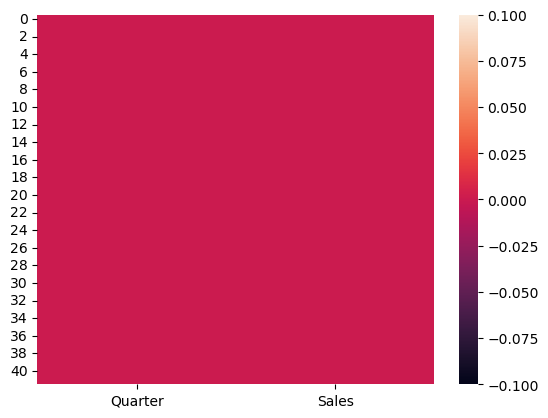

In [90]:
sns.heatmap(data1.isnull())

# visualize the data

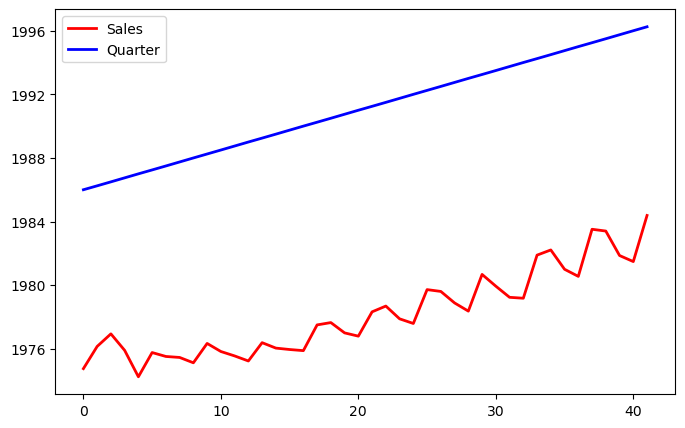

In [91]:
plt.figure(figsize=(8,5))
plt.plot(data1['Sales'], color = 'red',label='Sales', linewidth=2)
plt.plot(data1['Quarter'], color = 'blue',label='Quarter', linewidth=2)
plt.legend()
plt.show()

<Axes: >

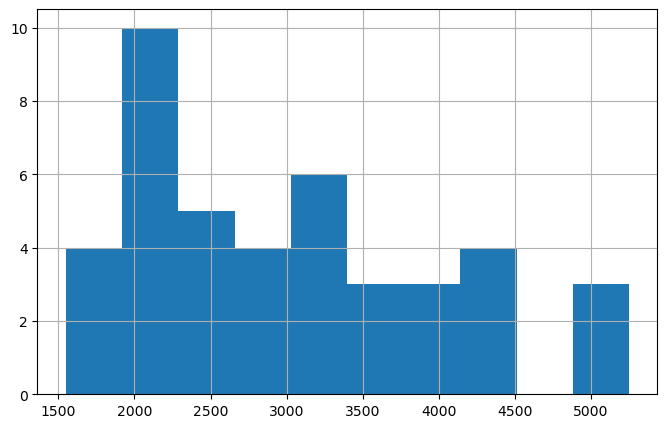

In [92]:
# Histogram
data1['Sales'].hist(figsize=(8,5))

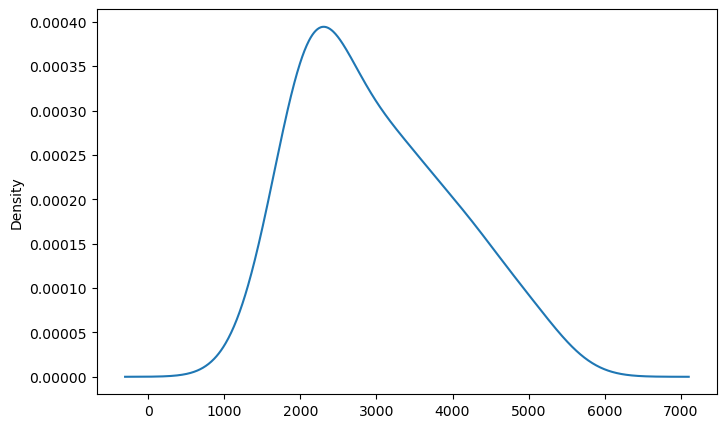

In [93]:
# Density Plot
data1['Sales'].plot(kind = 'kde', figsize=(8,5))
plt.show()

<Axes: xlabel='Quarter', ylabel='Sales'>

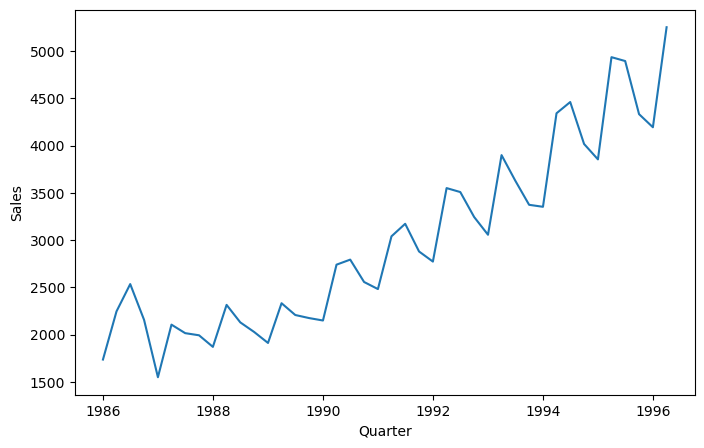

In [94]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Quarter",y="Sales",data=data1)

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

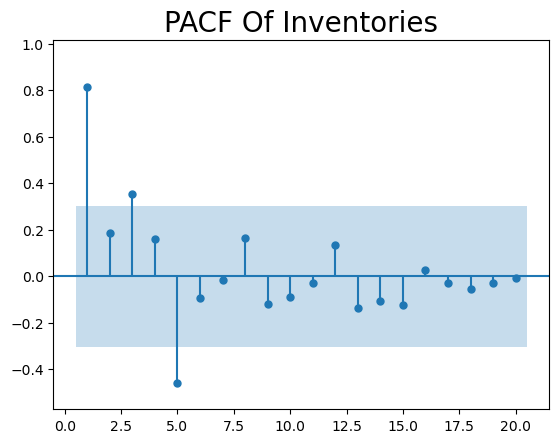

In [96]:
plot_pacf(data1.Sales, lags=20, zero=False,auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

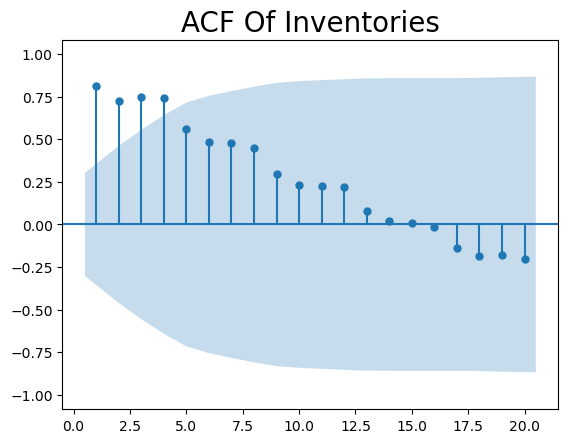

In [97]:
plot_acf(data1.Sales, lags=20, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

# split the data

In [98]:
train_length=int(len(data1)*0.75)
test_length=len(data1)-train_length
train_length,test_length

(31, 11)

In [99]:
train_data1=data1.Sales.iloc[:train_length]
test_data1=data1.Sales.iloc[train_length:]

In [100]:
train_data1.head()

0    1734.827000
1    2244.960999
2    2533.804993
3    2154.962997
4    1547.818996
Name: Sales, dtype: float64

In [101]:
test_data1.head()

31    3373.0
32    3352.0
33    4342.0
34    4461.0
35    4017.0
Name: Sales, dtype: float64

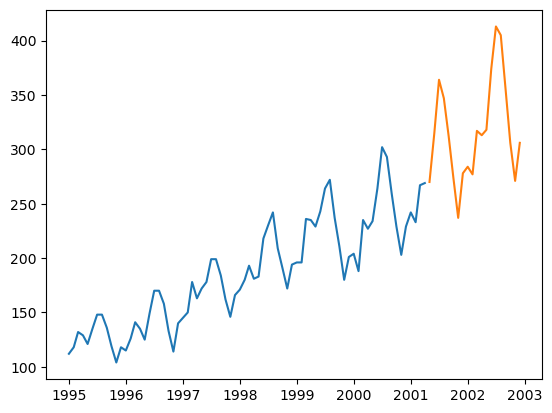

In [102]:
plt.plot(train_data)
plt.plot(test_data)
plt.show()

# Test for Stationarity

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
sts.adfuller(data1.Sales)

(1.3094210180613532,
 0.9966611674081021,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.66392127211776)

In [105]:
def adf_test(data1):
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [106]:
adf_test(data1)

Failed to reject the null hypothesis
Data is Not stationary


# Differencing the data

In [107]:

from statsmodels.tsa.statespace.tools import diff

In [108]:
df_2 = diff(data1,k_diff=3)

In [109]:
adf_test(df_2)

Failed to reject the null hypothesis
Data is Not stationary


In [110]:
print(df_2.columns)

Index(['Quarter', 'Sales'], dtype='object')


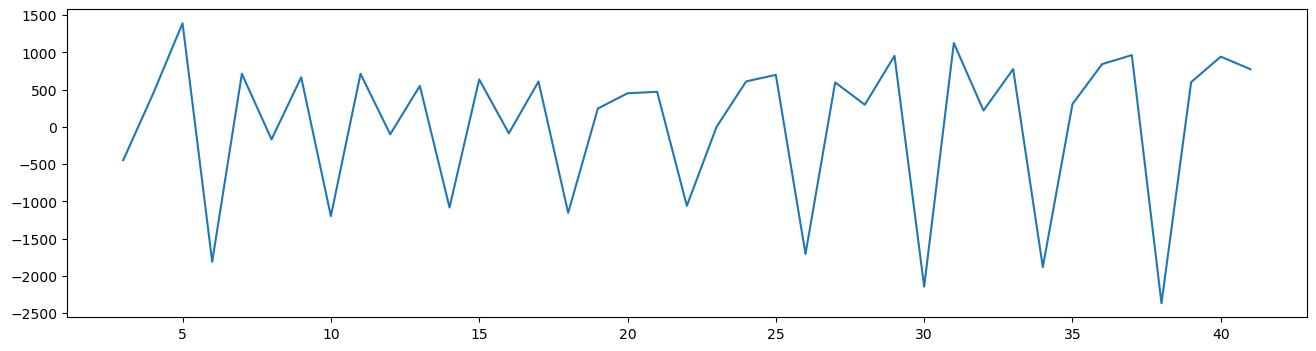

In [111]:
plt.figure(figsize=(16, 4))
plt.plot(df_2['Sales'])
plt.show()

# Find the order of AR , I and MA 

### Use ACF and PACF plots

In [112]:
df_3 = df_2['Sales'].astype(float)

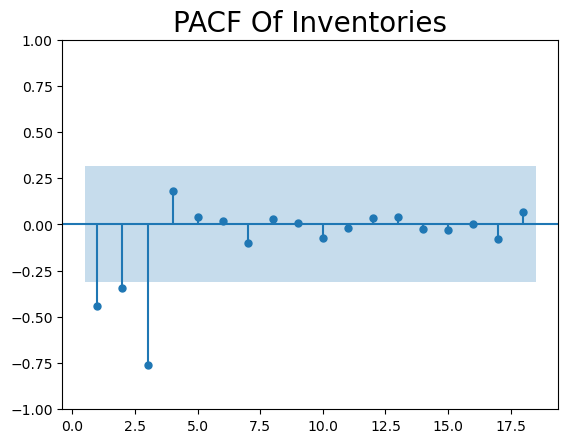

In [113]:
plot_pacf(df_3, lags=18, zero=False)
plt.title("PACF Of Inventories", size=20)
plt.show()

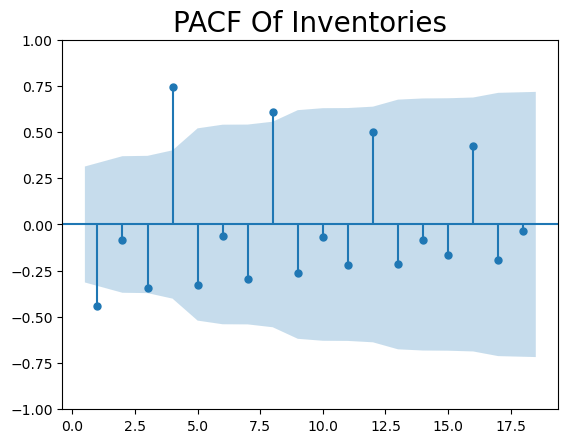

In [114]:
plot_acf(df_3, lags=18, zero=False)
plt.title("PACF Of Inventories", size=20)
plt.show()

# pmdarima

In [115]:
df_3 = df_2['Sales']

In [116]:
auto_model = auto_arima(df_3,  trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=583.991, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=650.603, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=644.324, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=536.587, Time=0.36 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=574.961, Time=0.54 sec
 ARIMA(4,0,2)(0,0,0)[0

In [117]:
auto_model.predict(10)

42   -2307.520385
43     635.595745
44     887.943084
45     669.334781
46   -2154.894747
47     674.068821
48     799.680255
49     575.650202
50   -2010.019055
51     703.656460
dtype: float64

# split the data

In [118]:
int(len(data1)*0.8)

33

In [119]:
train_data=data1[:33]

In [120]:
test_data=data1[33:]

In [121]:
train_data.head()

,Quarter,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996


In [122]:
test_data.head()

,Quarter,Sales
33,1994-04-01,4342.0
34,1994-07-01,4461.0
35,1994-10-01,4017.0
36,1995-01-01,3854.0
37,1995-04-01,4936.0


In [123]:
train_len=len(train_data)

In [124]:
test_len=len(test_data)

In [125]:
train_len,test_len

(33, 9)

In [126]:
model = ARIMA(train_data['Sales'], order=(5, 2, 3)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [127]:
test_pred=model.forecast(53)

In [128]:
test_pred.head()

33    4204.338955
34    3906.884257
35    3703.034717
36    3731.788611
37    4488.696042
Name: predicted_mean, dtype: float64

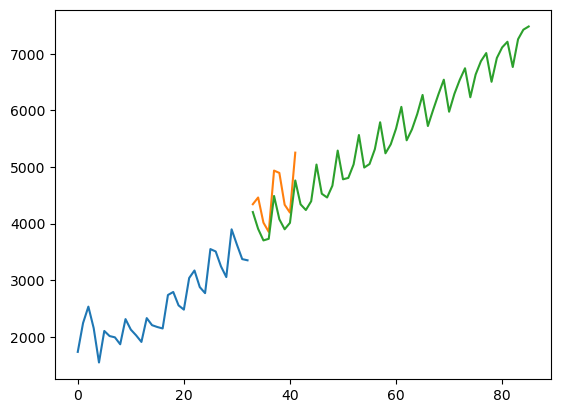

In [129]:
plt.plot(train_data['Sales'])
plt.plot(test_data['Sales'])
plt.plot(test_pred)
plt.show()

In [130]:
model = ARIMA(data1['Sales'], order=(5, 4, 0)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [131]:
forecast_values=model.forecast(53)

In [132]:
forecast_values.head()

42    5235.910450
43    4760.527871
44    4787.979040
45    6012.091367
46    6199.775454
Name: predicted_mean, dtype: float64

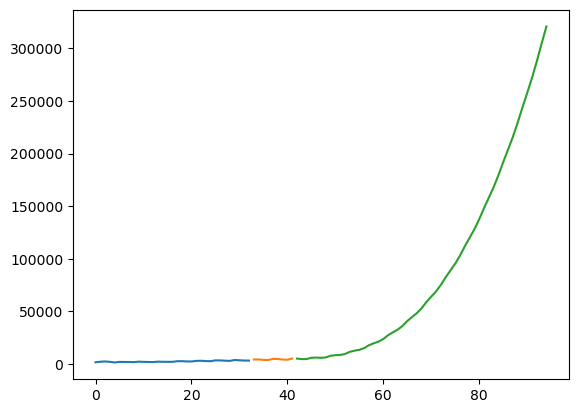

In [133]:
plt.plot(train_data['Sales'])
plt.plot(test_data['Sales'])
plt.plot(forecast_values)
plt.show()